# EJERCICIO LIBERTAD DE PRENSA

![](https://cnnespanol.cnn.com/wp-content/uploads/2018/01/libertad-prensa.jpeg?quality=100&strip=info)

Comparar el grado de libertad de prensa del que gozan los periodistas y los medios en 180 países o territorios: ése es el objetivo de la Clasificación Mundial de la Libertad de Prensa. Este análisis se basa en la definición de la libertad de prensa elaborada por RSF y su panel de expertos, en el marco de la revisión metodológica de 2022:



**La libertad de prensa es la posibilidad efectiva para los periodistas, como individuos y como colectivo, de seleccionar, producir y difundir informaciones, en aras del interés general, independientemente de las interferencias políticas, económicas, legales y sociales, y sin menoscabo para su seguridad física y mental.**

Para saber mas sobre la metodologia de medicion: https://rsf.org/es/clasificacion

Link del dataset: https://raw.githubusercontent.com/riverofacundo/cursos/main/libertad_prensa.csv

Columnas del dataset:

- ``codigo_iso``: Código ISO del país
- ``pais``: País
- ``anio``: Año del resultado
- ``indice``: Puntaje Índice Libertad de Prensa (menor puntaje = mayor libertad de prensa)
- ``ranking``: Ranking Libertad de Prensa

📰 Importar Pandas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

📰 Leer el .csv

In [ ]:
prensa = pd.read_csv('https://raw.githubusercontent.com/riverofacundo/cursos/main/libertad_prensa.csv')

📰 Imprimir los primeros 5 registros del dataframe

In [ ]:
pd.set_option('display.max_columns', None)
prensa.head()

,codigo_iso,pais,anio,indice,ranking
0,AFG,Afghanistán,2001,35.50,59.0
1,AFG,Afghanistán,2002,40.17,78.0
2,AFG,Afghanistán,2003,28.25,49.0
3,AFG,Afghanistán,2004,39.17,62.0
4,AFG,Afghanistán,2005,44.25,67.0


📰 Solo vamos a utilizar lo valores del 2017 para arriba (incluyendo 2017)

In [ ]:
prensa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codigo_iso  3060 non-null   object 
 1   pais        3060 non-null   object 
 2   anio        3060 non-null   int64  
 3   indice      2664 non-null   float64
 4   ranking     2837 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 119.7+ KB


In [ ]:
df = prensa[prensa['anio'] > 2016]

In [ ]:
df.sort_values('anio')

,codigo_iso,pais,anio,indice,ranking
14,AFG,Afghanistán,2017,39.46,120.0
2683,TGO,Togo,2017,30.75,86.0
2292,PRY,Paraguay,2017,35.64,110.0
1170,HKG,Hong Kong,2017,29.46,73.0
1187,HND,Honduras,2017,43.75,140.0
...,...,...,...,...,...
1648,LKA,Sri Lanka,2019,39.61,126.0
1665,LSO,Lesotho,2019,29.74,78.0
1682,LTU,Lituania,2019,22.06,30.0
1427,JPN,Japón,2019,29.36,67.0


📰 Imprimir la cantidad de filas y columnas del df

In [ ]:
df.shape

(540, 5)

📰 Utiliza un metodo perteneciente a los df para imprimir las columnas, la cantidad de no-nulos de cada una y el tipo de dato

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 14 to 3059
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codigo_iso  540 non-null    object 
 1   pais        540 non-null    object 
 2   anio        540 non-null    int64  
 3   indice      531 non-null    float64
 4   ranking     530 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 25.3+ KB


📰 Utiliza un metodo perteneciente a los df para imprimir informacion estadistica del df.

Tiendo en cuenta esta clasificacion:

| Puntaje | Situación      |
|---------|----------------|
| 0-15    | Buena          |
| 15-30   | Mas bien buena |
| 30-45   | Problematica   |
| 45-60   | Dificil        |
| 60-100  | Muy grave      |

- ¿Como es la dispersion?
- ¿En que situación se encuentra el promedio del mundo?
- El 25% de los paises se encuentra en que tipo de situación?
- Que puntaje tiene el peor pais?


In [ ]:
df.describe()

,anio,indice,ranking
count,540.000000,531.000000,530.000000
mean,2018.000000,35.085782,91.037736
std,0.817254,16.323416,52.285953
min,2017.000000,7.600000,1.000000
25%,2017.000000,24.935000,46.000000
50%,2018.000000,30.950000,92.000000
75%,2019.000000,43.280000,136.000000
max,2019.000000,88.870000,180.000000


In [ ]:
std = df['indice'].std().round()
print(f"Hay una dispersión histórica de {std} puntos del índice en relación a la media")

Hay una dispersión de 16.0 puntos del índice en relación a la media


In [ ]:
mean = df['indice'].mean().round()
print(f"El promedio a nivel mundial histórico es de {mean}  puntos.")

El promedio a nivel mundial es de 35.0  puntos.


In [ ]:
mean_pais = df.groupby('pais')['ranking'].mean()
lower = mean_pais.max()
peor_pais = mean_pais[mean_pais == lower].index[0]
print(f"El país con peor promedio a nivel mundial es {peor_pais} con promedio {lower.round()} ranking.")

El país con peor promedio a nivel mundial es Corea del Norte con promedio 180.0 ranking.


In [ ]:
df.groupby('pais')['ranking'].mean().sort_values()

pais
Noruega                1.000000
Suecia                 2.333333
Finlandia              3.000000
Países Bajos           4.000000
Dinamarca              6.000000
                        ...    
Eritrea              178.666667
Corea del Norte      179.666667
Antigua y Barbuda           NaN
Granada                     NaN
Kosovo                      NaN
Name: ranking, Length: 179, dtype: float64

⚠️¿Hay nulos en el df?⚠️

Si los hay reemplazar, probá estas formas de tratarlos, al final quedate con la que te parezca mejor o si te parecen todas malas elegi la menos peor y **justifica tu elección**.(Imaginate que estos datos seran utilizados para generar un informe de la ONU)

- Borrar las filas que contienen nulos
- Reemplazar los nulos por la media
- Reemplazar los nulos por la mediana


In [ ]:
df_nan = df.isna()
df_nan.sum()

codigo_iso     0
pais           0
anio           0
indice         9
ranking       10
dtype: int64

In [ ]:
mediana = df['ranking'].median()
mediana
#df = df.fillna(median_ranking)

92.0

📰 Imprimir solo las filas que contengan nulo en alguna columna

In [ ]:
df[df.isna().any(axis=1)].sort_values(['indice','ranking'])

,codigo_iso,pais,anio,indice,ranking
254,BFA,Burkina Faso,2019,24.53,NaN
133,ATG,Antigua y Barbuda,2017,NaN,NaN
134,ATG,Antigua y Barbuda,2018,NaN,NaN
135,ATG,Antigua y Barbuda,2019,NaN,NaN
1119,GRD,Granada,2017,NaN,NaN
1120,GRD,Granada,2018,NaN,NaN
1121,GRD,Granada,2019,NaN,NaN
1527,KSV,Kosovo,2017,NaN,NaN
1528,KSV,Kosovo,2018,NaN,NaN
1529,KSV,Kosovo,2019,NaN,NaN


In [ ]:
df['ranking'].fillna(df.loc[df['pais'] == 'Burkina Faso', 'ranking'].mean(), inplace=True)

In [ ]:
df.loc[df['pais'] == 'Burkina Faso']

,codigo_iso,pais,anio,indice,ranking
252,BFA,Burkina Faso,2017,23.85,42.0
253,BFA,Burkina Faso,2018,23.33,41.0
254,BFA,Burkina Faso,2019,24.53,41.5


📰 Reemplazo por la media

In [ ]:
df_mean = df.fillna(mean)

📰 Elimino las filas

### Se decide eliminar valores con registros nulos ya que la diferencia entre mean y mediana es muy amplia, presentado bastante dispersión de datos entre índices y rankings. Considerando también que son países que no proporcionana datos o forman parte de la ONU

In [ ]:
df = df.dropna()
df.isna().sum()

codigo_iso    0
pais          0
anio          0
indice        0
ranking       0
dtype: int64

⚠️A partir de ahora trabajaremos con el df sin nulos⚠️

📰 Ordenar el df en orden descendente tomando como referencia el Indice, ¿cual es el peor país del dataset (en cuestion de libertad de prensa)? Mostrar esta informacion de forma linda con un print

In [ ]:
best = df.sort_values(by='ranking', ascending=True).iloc[0]

print(f"El mejor país en términos de libertad de prensa es: {best[1]}")

El mejor país en términos de libertad de prensa es: Noruega


📰 El dataset ordenado de forma ascendente guardarlo en una variable y resetearle el indice, a partir de ahora se utilizara esta nueva variable para los siguientes puntos

In [ ]:
df_sort = df.sort_values('codigo_iso', ascending=True).reset_index(drop=True)

In [ ]:
df_sort.head(2)

,codigo_iso,pais,anio,indice,ranking
0,AFG,Afghanistán,2017,39.46,120.0
1,AFG,Afghanistán,2018,37.28,118.0


📰 **Enriquecimiento de datos**: para hacer un analisis por continente necesitamos una nueva columna que para cada registro asigne el continente de ese pais. Para esto leemos un nuevo dataset que contiene la informacion de la region y continente de cada pais.

In [ ]:
df2 = pd.read_csv('continente.csv',encoding = 'latin-1', sep = ";")

📰 "Mergeamos" ambos dataset por el codigo_iso

In [ ]:
merge = pd.merge(df_sort, df2, left_on='codigo_iso', right_on='ISO', how='left')

merge.head(2)

,codigo_iso,pais,anio,indice,ranking,ISO,PAIS,REGION,CONTINENTE
0,AFG,Afghanistán,2017,39.46,120.0,AFG,Afganistán,Asia meridional,Asia
1,AFG,Afghanistán,2018,37.28,118.0,AFG,Afganistán,Asia meridional,Asia


📰 Vemos si hay algun nulo, esto quiere decir que algunos "cruces no se pudieron realizar"

In [ ]:
merge.isna().sum()

codigo_iso    0
pais          0
anio          0
indice        0
ranking       0
ISO           3
PAIS          3
REGION        3
CONTINENTE    3
dtype: int64

📰 Si vas bien te tuvo que haber quedado Hong Kong con nulos, vamos a rellenarlo a mano, le asignaremos los datos de un pais vecino: Taiwan

In [ ]:
df_final = merge

taiwan = merge[merge['pais'] == 'Taiwán'].iloc[0]
df_final.loc[df_final['pais'] == 'Hong Kong'] = df_final.loc[df_final['pais'] == 'Hong Kong'].fillna(taiwan)

In [ ]:
df_final.head(4)

,codigo_iso,pais,anio,indice,ranking,ISO,PAIS,REGION,CONTINENTE
0,AFG,Afghanistán,2017,39.46,120.0,AFG,Afganistán,Asia meridional,Asia
1,AFG,Afghanistán,2018,37.28,118.0,AFG,Afganistán,Asia meridional,Asia
2,AFG,Afghanistán,2019,36.55,121.0,AFG,Afganistán,Asia meridional,Asia
3,AGO,Angola,2017,40.42,125.0,AGO,Angola,África central,África


📰 Sacar la mediana del indice por Continente, cual es el peor continente en terminos de libertad de prensa?

In [ ]:
mediana_cont = df_final.groupby('CONTINENTE')['indice'].median()
mediana_cont

CONTINENTE
América    29.000
Asia       43.240
Europa     22.200
Oceanía    21.475
África     34.830
Name: indice, dtype: float64

📰 Sacar la mediana del indice por Region, cual es la peor region en terminos de libertad de prensa?

In [ ]:
 df_final.groupby('REGION')['indice'].median().idxmax()

'Asia central'

In [ ]:
 df_final.groupby('REGION')['indice'].median().sort_values()

REGION
Europa septentrional         14.035
Europa occidental            14.495
Australia y Nueva Zelanda    14.720
América del Norte            20.130
Polinesia                    21.610
África meridional            25.090
Melanesia                    26.370
Caribe                       26.760
Europa meridional            28.050
Asia oriental                29.360
África occidental            30.195
Europa oriental              30.210
América del Sur              30.770
América central              30.785
África oriental              35.940
África central               39.055
Asia meridional              41.370
Asia occidental              42.930
Asia sudoriental             44.920
África septentrional         46.880
Asia central                 54.010
Name: indice, dtype: float64

📰  ¿Que paises constituyen la peor region?

![](https://upload.wikimedia.org/wikipedia/commons/a/a3/Central_Asia.svg)

In [ ]:
df_final.REGION.unique()

array(['Asia meridional', 'África central', 'Europa meridional',
       'Asia occidental', 'América del Sur', 'Australia y Nueva Zelanda',
       'Europa occidental', 'África oriental', 'África occidental',
       'Europa oriental', 'América central', 'Asia sudoriental',
       'África meridional', 'América del Norte', 'Asia oriental',
       'Caribe', 'Europa septentrional', 'África septentrional',
       'Melanesia', 'Asia central', 'Polinesia'], dtype=object)

In [ ]:
asia_central = df_final[df_final['REGION'] == 'Asia central']
asia_central.PAIS.unique()

array(['Kazajstán', 'Kirguistán', 'Tadyikistán', 'Turkmenistán',
       'Uzbekistán'], dtype=object)

📰 Hace algun grafico que muestre algun dato interesante

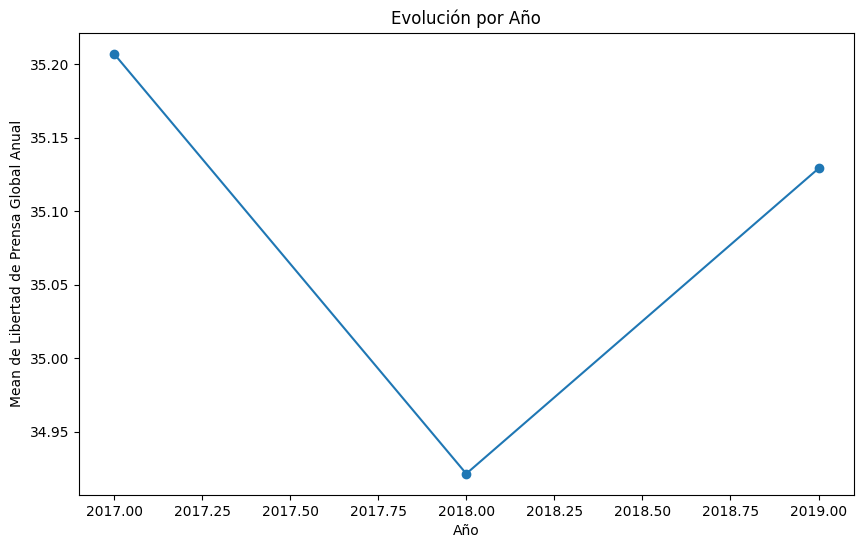

In [ ]:
indice_medio_por_anio = df.groupby('anio')['indice'].mean()

plt.figure(figsize=(10, 6))
plt.plot(indice_medio_por_anio.index, indice_medio_por_anio.values, marker='o', linestyle='-')

plt.xlabel('Año')
plt.ylabel('Mean de Libertad de Prensa Global Anual')
plt.title('Evolución por Año')

plt.show()


📰 Filtrar américa del sur, analizar si en los ultimos años el indice de libertad de prensa mejoro o empeoro

In [ ]:
america_sur = df_final[df_final['REGION'] == 'América del Sur']

america_sur.groupby('anio')['indice'].mean()

anio
2017    29.835833
2018    29.237500
2019    30.634167
Name: indice, dtype: float64

In [ ]:
print(f"la libertad de prensa en América del Sur ha emperoado.")

la libertad de prensa en América del Sur ha emperoado.


📰 Crear una nueva columna llamada ``situacion`` en funcion del indice del pais

| Puntaje | Situación      |
|---------|----------------|
| 0-15    | Buena          |
| 15-30   | Mas bien buena |
| 30-45   | Problematica   |
| 45-60   | Dificil        |
| 60-100  | Muy grave      |


In [ ]:
df_final2 = df_final

rangos = [0, 15, 30, 45, 60, 100]
etiquetas = ['Buena', 'Mas bien buena', 'Problematica', 'Dificil', 'Muy grave']

df_final2['situacion'] = pd.cut(df_final2['indice'], bins=rangos, labels=etiquetas, right=False)
df_final2[['pais', 'indice', 'situacion']].sort_values('indice').head()

,pais,indice,situacion
357,Noruega,7.60,Buena
358,Noruega,7.63,Buena
359,Noruega,7.82,Buena
158,Finlandia,7.90,Buena
447,Suecia,8.27,Buena




📰 Que region tiene la mayor cantidad de situaciones buenas o mas bien buenas?

In [ ]:
region_buenas = df_final2[(df_final2['situacion'] == 'Buena') | (df_final2['situacion'] == 'Mas bien buena')]

region_buenas.groupby('REGION').size().sort_values(ascending=False)

REGION
Europa meridional            31
Europa septentrional         30
Europa occidental            24
África occidental            20
América del Sur              15
Asia oriental                15
Europa oriental              14
África oriental              13
África meridional            12
Caribe                       12
América central              10
Asia occidental               8
América del Norte             6
Australia y Nueva Zelanda     6
Melanesia                     6
Polinesia                     6
Asia sudoriental              1
Asia meridional               1
Asia central                  1
África septentrional          1
dtype: int64

📰  Ejercicio libre: asi como vinimos haciendo hasta este punto, genera informacion interesante sobre estos datos (al menos 2 datos/graficos interesantes)

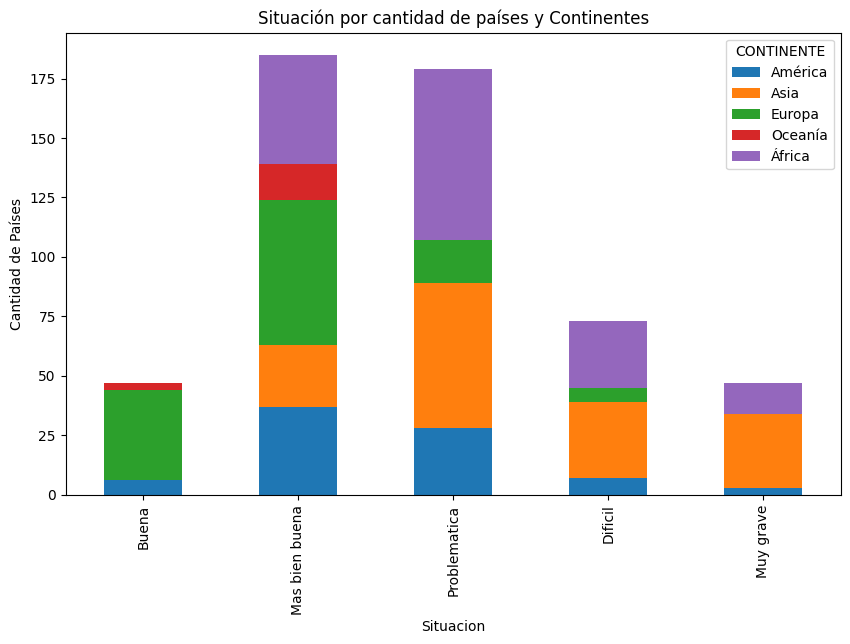

In [ ]:
plot_sit = df_final2.groupby(['situacion', 'CONTINENTE']).size().unstack()
plot_sit.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Situacion')
plt.ylabel('Cantidad de Países')
plt.title('Situación por cantidad de países y Continentes')

plt.show()
